
请选择启动模式：
  1. 完整模式（包含SQL/Python工具调用）
  2. 简化模式（纯对话，无工具）
  3. 退出



请输入选项 (1/2/3):  1


智能体框架 - Agent Framework (Optimized)
API服务: https://dashscope.aliyuncs.com/compatible-mode/v1
使用模型: deepseek-v3

[初始化] 正在创建 OpenAI 客户端...
[初始化] 客户端创建成功！

交互式对话已就绪
提示：
  - 输入 '退出' 结束对话
  - 输入 '加载历史' 加载之前的对话记录



请输入您的问题:  把 churn 预测需要的特征整理成一张特征表（数值+类别都处理好），导出文件，并给我一个简单模型的效果和重要特征



[系统] 开始对话...

[系统] 已启用自动错误修复功能（最多重试3次）

【系统】会话开始。输入 '加载历史' 可加载历史摘要。
已将问题转化为如下代码准备运行：


```sql
SELECT * FROM customer_churn LIMIT 1000
```

即将执行以上代码，请确认是否执行（1），或者退出（2）:  1


正在执行代码，请稍后...
[AutoFix] SHOW TABLES 结果：['user_demographics']
已将问题转化为如下代码准备运行：


```sql
SELECT * FROM user_demographics LIMIT 1000
```

即将执行以上代码，请确认是否执行（1），或者退出（2）:  1


正在执行代码，请稍后...
已将问题转化为如下代码准备运行：


```sql
SELECT * FROM user_demographics
-- DataFrame变量名: df
```

即将执行以上代码，请确认是否执行（1），或者退出（2）:  1


正在执行代码，请稍后...


C:\Users\ROG\AppData\Local\Temp\ipykernel_27492\3141585511.py:512: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  globals()[actual_df_name] = pd.read_sql(actual_sql, connection)


已将问题转化为如下代码准备运行：


```python
{"py_code":"import pandas as pd\nfrom sklearn.preprocessing import StandardScaler, OneHotEncoder\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score, roc_auc_score\nfrom sklearn.feature_selection import SelectKBest, f_classif\n\n# 加载数据\ndf = globals().get('df')\n\n# 目标变量编码\ndf['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})\n\n# 数值型特征\nnumeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']\n# TotalCharges 需要转换为数值型（当前是字符串）\ndf['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')\n# 填充可能的缺失值\ndf[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())\n\n# 类别型特征\ncategorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']\n\n# 独热编码\ndf_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)\n\n# 标准化数值型特征\nscaler = StandardScaler()\ndf_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])\n\n# 导出处理后的特征表\ndf_encoded.to_csv('churn_features_processed.csv', index=False)\n\n# 划分训练集和测试集\nX = df_encoded.drop(['customerID', 'Churn'], axis=1)\ny = df_encoded['Churn']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# 训练逻辑回归模型\nmodel = LogisticRegression(max_iter=1000)\nmodel.fit(X_train, y_train)\n\n# 预测并评估\ny_pred = model.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nroc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])\n\n# 特征重要性\nfeature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})\nfeature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()\nfeature_importance = feature_importance.sort_values('Absolute_Coefficient', ascending=False)\n\nprint(f'模型准确率: {accuracy:.4f}')\nprint(f'模型AUC: {roc_auc:.4f}')\nprint('\\nTop 10重要特征:')\nprint(feature_importance.head(10))"}
```

即将执行以上代码，请确认是否执行（1），或者退出（2）:  1


正在执行代码，请稍后...
模型准确率: 0.8211
模型AUC: 0.8621

Top 10重要特征:
                           Feature  Coefficient  Absolute_Coefficient
25               Contract_Two year    -1.397237              1.397237
0                           tenure    -1.321098              1.321098
10     InternetService_Fiber optic     0.995565              0.995565
24               Contract_One year    -0.636522              0.636522
2                     TotalCharges     0.607224              0.607224
7                 PhoneService_Yes    -0.516047              0.516047
13              OnlineSecurity_Yes    -0.402642              0.402642
23             StreamingMovies_Yes     0.369086              0.369086
26            PaperlessBilling_Yes     0.332640              0.332640
28  PaymentMethod_Electronic check     0.323330              0.323330
模型回答: ### 结果总结
1. **特征表导出**：已成功将处理后的特征表保存为 `churn_features_processed.csv`。
2. **模型效果**：
   - **准确率**：82.11%
   - **AUC**：86.21%（AUC > 0.8 表示模型具有良好的区分能力）
3. **Top 10重要特征**：

| 

您还有其他问题吗？(输入 '退出' 结束，输入 '加载历史' 读取旧记忆):  找出月费高但总费低的异常用户群，看看他们流失率和合同/支付方式有什么特点，并画散点图标出来。


已将问题转化为如下代码准备运行：


```sql
SELECT customer_id, monthly_charges, total_charges, churn, contract, payment_method FROM customers WHERE monthly_charges > 50 AND total_charges < 1000 LIMIT 1000
```

即将执行以上代码，请确认是否执行（1），或者退出（2）:  1


正在执行代码，请稍后...
[AutoFix] SHOW TABLES 结果：['user_demographics']
已将问题转化为如下代码准备运行：


```sql
SELECT customer_id, monthly_charges, total_charges, churn, contract, payment_method FROM user_demographics WHERE monthly_charges > 50 AND total_charges < 1000 LIMIT 1000
```

即将执行以上代码，请确认是否执行（1），或者退出（2）:  1


正在执行代码，请稍后...
已将问题转化为如下代码准备运行：


```sql
SHOW TABLES
```

即将执行以上代码，请确认是否执行（1），或者退出（2）:  1


正在执行代码，请稍后...
已将问题转化为如下代码准备运行：


```sql
{"sql_query":"DESCRIBE user_demographics"}
```

即将执行以上代码，请确认是否执行（1），或者退出（2）:  1


正在执行代码，请稍后...
已将问题转化为如下代码准备运行：


```sql
SELECT customerID, MonthlyCharges, TotalCharges, Churn, Contract, PaymentMethod FROM user_demographics WHERE MonthlyCharges > 50 AND TotalCharges < 1000 LIMIT 1000
```

即将执行以上代码，请确认是否执行（1），或者退出（2）:  1


正在执行代码，请稍后...
已将问题转化为如下代码准备运行：


```sql
SELECT customerID, MonthlyCharges, TotalCharges, Churn, Contract, PaymentMethod FROM user_demographics WHERE MonthlyCharges > 50 AND TotalCharges < 1000
-- DataFrame变量名: df_abnormal
```

即将执行以上代码，请确认是否执行（1），或者退出（2）:  1


正在执行代码，请稍后...


C:\Users\ROG\AppData\Local\Temp\ipykernel_27492\3141585511.py:512: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  globals()[actual_df_name] = pd.read_sql(actual_sql, connection)


已将问题转化为如下代码准备运行：


```python
import pandas as pd
import matplotlib.pyplot as plt

# 转换TotalCharges为数值类型（注意空字符串的处理）
df_abnormal['TotalCharges'] = pd.to_numeric(df_abnormal['TotalCharges'], errors='coerce')
df_abnormal = df_abnormal.dropna(subset=['TotalCharges'])

# 绘制散点图：MonthlyCharges vs TotalCharges，按Churn分组
fig = plt.figure(figsize=(10, 6))
for churn_status, color in zip(['Yes', 'No'], ['red', 'blue']):
    subset = df_abnormal[df_abnormal['Churn'] == churn_status]
    plt.scatter(subset['MonthlyCharges'], subset['TotalCharges'], 
                c=color, label=f'Churn={churn_status}', alpha=0.6)

plt.title('Monthly Charges vs Total Charges (Abnormal Users)')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Total Charges ($)')
plt.legend()
plt.grid(True)
plt.show()
```

即将执行以上代码，请确认是否执行（1），或者退出（2）:  1


正在执行代码，请稍后...


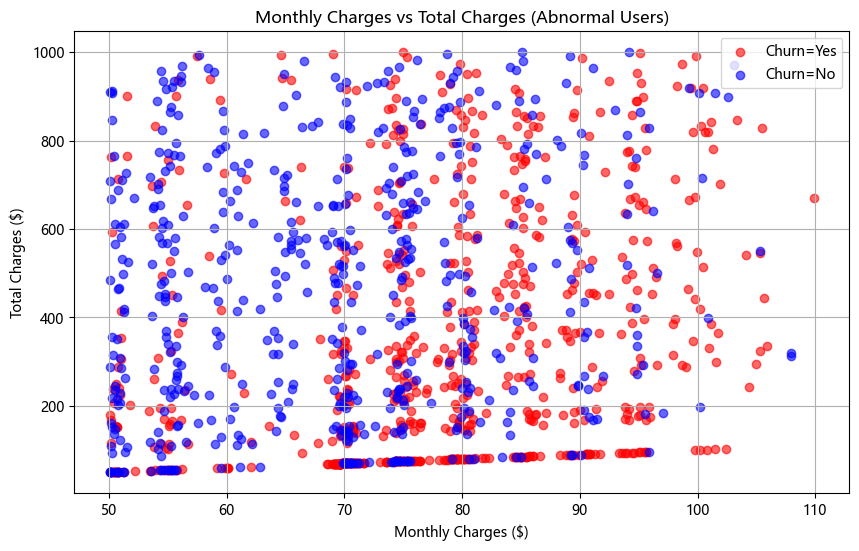

已将问题转化为如下代码准备运行：


```python
{"py_code":"# 计算流失率\nchurn_rate = df_abnormal['Churn'].value_counts(normalize=True) * 100\n\n# 合同类型与流失率\ncontract_churn = df_abnormal.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100\n\n# 支付方式与流失率\npayment_churn = df_abnormal.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack() * 100\n\n# 输出结果\nprint(f'整体流失率:\n{churn_rate}\n\n合同类型流失率:\n{contract_churn}\n\n支付方式流失率:\n{payment_churn}')"}
```

即将执行以上代码，请确认是否执行（1），或者退出（2）:  1


正在执行代码，请稍后...
已将问题转化为如下代码准备运行：


```python
# 计算流失率
churn_rate = df_abnormal['Churn'].value_counts(normalize=True) * 100

# 合同类型与流失率
contract_churn = df_abnormal.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100

# 支付方式与流失率
payment_churn = df_abnormal.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack() * 100

# 输出结果
print('整体流失率:')
print(churn_rate)
print('\n合同类型流失率:')
print(contract_churn)
print('\n支付方式流失率:')
print(payment_churn)
```

即将执行以上代码，请确认是否执行（1），或者退出（2）:  1


正在执行代码，请稍后...
整体流失率:
Churn
Yes    57.187017
No     42.812983
Name: proportion, dtype: float64

合同类型流失率:
Churn                   No        Yes
Contract                             
Month-to-month   40.839387  59.160613
One year         84.782609  15.217391
Two year        100.000000        NaN

支付方式流失率:
Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  45.112782  54.887218
Credit card (automatic)    55.072464  44.927536
Electronic check           36.122178  63.877822
Mailed check               54.074074  45.925926
模型回答: ### 异常用户群分析结果

#### 1. 整体流失率
- **流失用户（Churn=Yes）**: 57.19%
- **未流失用户（Churn=No）**: 42.81%

#### 2. 合同类型与流失率
| 合同类型         | 未流失率（No） | 流失率（Yes） |
|------------------|----------------|----------------|
| Month-to-month   | 40.84%         | 59.16%         |
| One year         | 84.78%         | 15.22%         |
| Two year         | 100.00%        | 0.00%          |

**结论**：月付合同用户流失率最高（59.16%），而年付和两年合同

In [ ]:
"""
agent_framework_optimized.py
===========================

基于你原始框架的改进版（保持原始默认配置）：

默认值（按原始源代码）：
- OPENAI_BASE_URL 默认: https://dashscope.aliyuncs.com/compatible-mode/v1
- OPENAI_MODEL    默认: deepseek-v3
- MYSQL_PW        默认: 123456
- API Key         必须来自环境变量（不再硬编码进文件）

改进点：
1) 固定 tools schema（不再用 auto_functions 生成，避免 schema 漂移）
2) sql_inter 结构化输出（columns/rows/row_count），SELECT 默认 LIMIT 50
3) check_code_run 支持多轮 tool calls（模型可连续 SHOW TABLES / DESCRIBE / SELECT）
4) 对 MySQL 常见错误码做确定性修复：
   - 1146 表不存在：自动 SHOW TABLES + 近似匹配 + 重写 SQL
   - 1054 列不存在：引导模型先 DESCRIBE 再改写 SQL
5) 默认可视化（AutoViz）兜底：
   - sql_inter 成功后，若满足"用户想要可视化"或"SQL 看起来是聚合统计"，自动：
     extract_data(同一SQL，但默认加 LIMIT 200) -> python_inter(自动画图并直接展示)

依赖：
pip install openai tiktoken pymysql pandas ipython matplotlib

建议设置环境变量：
Windows (PowerShell):
  $env:OPENAI_API_KEY="你的key"
  $env:OPENAI_BASE_URL="https://dashscope.aliyuncs.com/compatible-mode/v1"   # 可选
  $env:OPENAI_MODEL="deepseek-v3"                                            # 可选
  $env:MYSQL_PW="123456"                                                     # 可选

Linux/macOS (bash):
  export OPENAI_API_KEY="你的key"
  export OPENAI_BASE_URL="https://dashscope.aliyuncs.com/compatible-mode/v1" # 可选
  export OPENAI_MODEL="deepseek-v3"                                          # 可选
  export MYSQL_PW="123456"                                                   # 可选
"""

import os
import json
import re
from datetime import datetime
from difflib import SequenceMatcher
from typing import Any, Optional

import tiktoken
from openai import OpenAI

# IPython display 在纯终端里也能跑，只是 display(Markdown) 可能退化为普通输出
try:
    from IPython.display import display, Markdown
except Exception:
    display = None
    Markdown = None


# ============================================================================
# 默认配置（按原始源代码）
# ============================================================================

DEFAULT_BASE_URL = os.getenv("OPENAI_BASE_URL", "https://dashscope.aliyuncs.com/compatible-mode/v1")
DEFAULT_MODEL = os.getenv("OPENAI_MODEL", "deepseek-v3")
DEFAULT_MYSQL_PW = os.getenv("MYSQL_PW", "123456")

# API Key：只从环境变量读取（不硬编码）
DEFAULT_API_KEY = "sk-dd65d754d561467fa8e43efd803dfbc0"

# ============================================================================
# AutoViz 配置
# ============================================================================
AUTO_VIZ_DEFAULT = True
MAX_VIZ_ROWS = 80          # sql_inter 返回 row_count <= 80 时更适合自动绘图
AUTO_VIZ_LIMIT = 200       # 自动绘图时 extract_data 用的 LIMIT（避免拉全表）
SAVE_VIZ_TO_FILES = False  # 不保存图片到文件
SHOW_VIZ = True            # 直接在终端/notebook中展示图片


# ============================================================================
# 客户端初始化
# ============================================================================

def create_client(api_key: str, base_url: str = None) -> OpenAI:
    """
    创建 OpenAI 客户端实例（兼容 OpenAI / DashScope 兼容模式等）
    """
    if base_url:
        return OpenAI(api_key=api_key, base_url=base_url)
    return OpenAI(api_key=api_key)


# ============================================================================
# 消息字段访问辅助函数（兼容字典和 Pydantic 对象）
# ============================================================================

def _get_message_field(m, field: str, default=""):
    """
    统一从消息对象中获取字段，兼容字典和 Pydantic 对象（如 ChatCompletionMessage）
    
    参数:
        m: 消息对象（可以是 dict 或 Pydantic 对象）
        field: 要获取的字段名
        default: 默认值
        
    返回:
        字段值或默认值
    """
    if isinstance(m, dict):
        return m.get(field, default)
    else:
        # Pydantic 对象用属性访问
        value = getattr(m, field, default)
        # 处理 None 的情况
        return value if value is not None else default


def _message_to_dict(m) -> dict:
    """
    将消息对象转换为字典格式，兼容字典和 Pydantic 对象
    
    参数:
        m: 消息对象
        
    返回:
        dict: 消息字典
    """
    if isinstance(m, dict):
        return m
    else:
        # Pydantic 对象转字典
        result = {
            "role": getattr(m, "role", ""),
            "content": getattr(m, "content", "") or "",
        }
        # 正确序列化 tool_calls（关键修复）
        if hasattr(m, "tool_calls") and m.tool_calls:
            tool_calls_list = []
            for tc in m.tool_calls:
                tc_dict = {
                    "id": tc.id,
                    "type": "function",
                    "function": {
                        "name": tc.function.name,
                        "arguments": tc.function.arguments
                    }
                }
                tool_calls_list.append(tc_dict)
            result["tool_calls"] = tool_calls_list
        return result


# ============================================================================
# JSON / Code 工具
# ============================================================================

def clean_json_string(text: str) -> str:
    if text.startswith("```json"):
        text = text[7:]
    elif text.startswith("```"):
        text = text[3:]
    if text.endswith("```"):
        text = text[:-3]
    return text.strip()


def extract_sql(json_str: str) -> str:
    try:
        obj = json.loads(json_str)
    except Exception:
        return str(json_str)

    if isinstance(obj, dict):
        if "sql_query" in obj and isinstance(obj["sql_query"], str):
            return obj["sql_query"]
        for k in ("query", "sql", "sqlQuery"):
            if k in obj and isinstance(obj[k], str):
                return obj[k]
        for v in obj.values():
            if isinstance(v, str) and v.strip():
                return v

    if isinstance(obj, str):
        return obj

    return str(obj)


def extract_python(json_str: str) -> str:
    """
    工具参数容错提取：
    - 正常：{"py_code": "..."} 或 {"code": "..."}
    - 异常：直接是一段代码字符串
    - 更异常：半截 JSON / 非法 JSON -> 直接当作代码返回
    """
    try:
        obj = json.loads(json_str)
    except Exception:
        return str(json_str)

    if isinstance(obj, dict):
        if "py_code" in obj and isinstance(obj["py_code"], str):
            return obj["py_code"]
        for k in ("code", "python", "script", "source", "py"):
            if k in obj and isinstance(obj[k], str):
                return obj[k]
        for v in obj.values():
            if isinstance(v, str) and v.strip():
                return v

    if isinstance(obj, str):
        return obj

    return str(obj)


def insert_fig_object(code_str: str) -> str:
    """
    给绘图代码插入 fig = plt.figure()（如果检测到绘图调用但未创建 fig）
    """
    if "fig = plt.figure" in code_str:
        return code_str

    plot_aliases = ["plt.", "matplotlib.pyplot."]
    sns_aliases = ["sns.", "seaborn."]

    positions = [
        code_str.find(alias)
        for alias in (plot_aliases + sns_aliases)
        if code_str.find(alias) >= 0
    ]
    first_plot_occurrence = min(positions) if positions else -1

    if first_plot_occurrence != -1:
        plt_figure_index = code_str.find("plt.figure")
        if plt_figure_index != -1:
            closing = code_str.find(")", plt_figure_index)
            if closing != -1:
                return (
                    code_str[:plt_figure_index]
                    + "fig = "
                    + code_str[plt_figure_index : closing + 1]
                    + code_str[closing + 1 :]
                )
        return code_str[:first_plot_occurrence] + "fig = plt.figure()\n" + code_str[first_plot_occurrence:]

    return code_str


def is_error_response(response) -> bool:
    if response is None:
        return True

    response_str = str(response).lower()
    error_keywords = [
        "error",
        "exception",
        "traceback",
        "failed",
        "failure",
        "invalid",
        "denied",
        "refused",
        "not found",
        "does not exist",
        "no such",
        "unknown",
        "syntax error",
        "operationalerror",
        "programmingerror",
        "integrityerror",
        "dataerror",
        "assertionerror",
        "keyerror",
        "valueerror",
        "typeerror",
        "nameerror",
        "indexerror",
        "attributeerror",
        "importerror",
        "modulenotfounderror",
        "filenotfounderror",
        "permissionerror",
        "connectionerror",
        "timeouterror",
    ]
    return any(k in response_str for k in error_keywords)


def _pretty_print_code(markdown_code: str):
    """
    在 notebook 环境用 Markdown 渲染；在终端里直接 print
    """
    if display is not None and Markdown is not None:
        display(Markdown(markdown_code))
    else:
        print(markdown_code)


# ============================================================================
# SQL 辅助：默认 LIMIT（避免拉全表）
# ============================================================================

def _ensure_select_limit(sql: str, default_limit: int = 50) -> str:
    q = (sql or "").strip().rstrip(";")
    if re.match(r"(?is)^\s*select\b", q) and not re.search(r"(?is)\blimit\b", q):
        q = f"{q} LIMIT {default_limit}"
    return q


# ============================================================================
# SQL 修复辅助：解析错误 + schema 探测 + 近似匹配 + 重写
# ============================================================================

def _json_load_maybe(s: str):
    try:
        return json.loads(s)
    except Exception:
        return None


def _flatten_show_tables(tool_json: str) -> list:
    data = _json_load_maybe(tool_json)
    if not data:
        return []

    rows = data.get("rows") if isinstance(data, dict) and "rows" in data else data
    out = []
    for r in rows:
        if isinstance(r, (list, tuple)) and r:
            out.append(str(r[0]))
        else:
            out.append(str(r))
    return out


def _best_match(name: str, candidates: list) -> tuple:
    name_l = name.lower()
    best, best_score = None, 0.0
    for c in candidates:
        score = SequenceMatcher(None, name_l, c.lower()).ratio()
        if score > best_score:
            best, best_score = c, score
    return best, best_score


def _mysql_error_code(err: str) -> int:
    m = re.search(r"\((\d{4})\s*,", err)
    return int(m.group(1)) if m else None


def _parse_mysql_missing_table(err: str) -> str:
    m = re.search(r"Table\s+'[^']+\.(?P<table>[^']+)'\s+doesn't exist", err, re.I)
    return m.group("table") if m else None


def _parse_mysql_unknown_column(err: str) -> str:
    m = re.search(r"Unknown column\s+'(?P<col>[^']+)'", err, re.I)
    return m.group("col") if m else None


def _rewrite_sql_replace_table(sql: str, old: str, new: str) -> str:
    return re.sub(rf"(?i)\b{re.escape(old)}\b", new, sql)


# ============================================================================
# 工具函数：SQL / Python / Extract Data
# ============================================================================

def sql_inter(sql_query: str) -> str:
    """
    SQL查询执行器（结构化输出）
    返回 JSON: {"columns": [...], "rows": [...], "row_count": n}
    并对 SELECT 默认加 LIMIT 50（若用户没写 LIMIT）
    支持直接传入SQL字符串，或者 JSON 格式的 {"sql_query": "..."} 
    """
    import pymysql
    import decimal

    # 先尝试从 JSON 中提取 SQL（容错处理）
    actual_sql = sql_query
    try:
        obj = json.loads(sql_query)
        if isinstance(obj, dict):
            # 尝试多种可能的 key
            for key in ("sql_query", "query", "sql", "sqlQuery"):
                if key in obj and isinstance(obj[key], str):
                    actual_sql = obj[key]
                    break
    except (json.JSONDecodeError, TypeError):
        # 不是 JSON 格式，直接使用原始字符串
        pass

    q = _ensure_select_limit(actual_sql, default_limit=50)

    connection = pymysql.connect(
        host="localhost",
        user="root",
        passwd=DEFAULT_MYSQL_PW,
        db="telco_db",
        charset="utf8",
    )

    try:
        with connection.cursor() as cursor:
            cursor.execute(q)
            rows = cursor.fetchall()
            cols = [d[0] for d in (cursor.description or [])]

            processed_rows = []
            for r in rows:
                rr = []
                for x in r:
                    rr.append(float(x) if isinstance(x, decimal.Decimal) else x)
                processed_rows.append(rr)

            return json.dumps(
                {"columns": cols, "rows": processed_rows, "row_count": len(processed_rows)},
                ensure_ascii=False,
            )
    finally:
        connection.close()


def python_inter(py_code: str) -> str:
    """
    Python代码执行器
    支持直接传入代码字符串，或者 JSON 格式的 {"py_code": "..."} 
    """
    # 先尝试从 JSON 中提取代码（容错处理）
    actual_code = py_code
    try:
        obj = json.loads(py_code)
        if isinstance(obj, dict):
            # 尝试多种可能的 key
            for key in ("py_code", "code", "python", "script", "source"):
                if key in obj and isinstance(obj[key], str):
                    actual_code = obj[key]
                    break
    except (json.JSONDecodeError, TypeError):
        # 不是 JSON 格式，直接使用原始字符串
        pass
    
    # 检测是否包含 matplotlib 绑图代码，如果是则注入中文字体配置
    if "plt." in actual_code or "matplotlib" in actual_code:
        font_config = """
# ===== 自动注入：中文字体配置 =====
import matplotlib.pyplot as plt
import matplotlib
# Windows 系统常用中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei', 'SimSun', 'KaiTi', 'FangSong', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# ===== 中文字体配置结束 =====

"""
        actual_code = font_config + actual_code
    
    actual_code = insert_fig_object(actual_code)
    global_vars_before = set(globals().keys())

    try:
        exec(actual_code, globals())
    except Exception as e:
        return f"执行错误: {type(e).__name__}: {str(e)}"

    global_vars_after = set(globals().keys())
    new_vars = global_vars_after - global_vars_before

    if new_vars:
        result = {var: globals()[var] for var in new_vars}
        return str(result)
    else:
        try:
            return str(eval(actual_code, globals()))
        except Exception:
            return "已经顺利执行代码"


def extract_data(sql_query: str, df_name: str = "df") -> str:
    """
    将SQL查询结果加载到DataFrame变量中
    支持直接传入SQL字符串，或者 JSON 格式的参数
    """
    import pymysql
    import pandas as pd

    # 先尝试从 JSON 中提取参数（容错处理）
    actual_sql = sql_query
    actual_df_name = df_name
    
    # 如果 sql_query 是 JSON 格式，尝试解析
    try:
        obj = json.loads(sql_query)
        if isinstance(obj, dict):
            for key in ("sql_query", "query", "sql", "sqlQuery"):
                if key in obj and isinstance(obj[key], str):
                    actual_sql = obj[key]
                    break
            # 同时检查是否包含 df_name
            if "df_name" in obj and isinstance(obj["df_name"], str):
                actual_df_name = obj["df_name"]
    except (json.JSONDecodeError, TypeError):
        pass

    connection = pymysql.connect(
        host="localhost",
        user="root",
        passwd=DEFAULT_MYSQL_PW,
        db="telco_db",
        charset="utf8",
    )
    globals()[actual_df_name] = pd.read_sql(actual_sql, connection)
    connection.close()

    return f"已成功完成 {actual_df_name} 变量创建"


# ============================================================================
# 固定 Tools Schema
# ============================================================================

TOOLS_MAP = [
    {
        "name": "sql_inter",
        "description": "在 telco_db 上执行 SQL，返回 JSON: {columns, rows, row_count}。SELECT 默认 LIMIT 50。",
        "parameters": {
            "type": "object",
            "properties": {"sql_query": {"type": "string", "description": "要执行的 SQL 语句"}},
            "required": ["sql_query"],
        },
    },
    {
        "name": "python_inter",
        "description": "执行 Python 代码（谨慎使用）。",
        "parameters": {
            "type": "object",
            "properties": {"py_code": {"type": "string", "description": "要执行的 Python 代码"}},
            "required": ["py_code"],
        },
    },
    {
        "name": "extract_data",
        "description": "把 SQL 查询结果加载到本地 DataFrame 变量中。",
        "parameters": {
            "type": "object",
            "properties": {
                "sql_query": {"type": "string", "description": "用于读取数据的 SQL"},
                "df_name": {"type": "string", "description": "DataFrame 变量名"},
            },
            "required": ["sql_query", "df_name"],
        },
    },
]


# ============================================================================
# AutoViz：判定 + 生成代码
# ============================================================================

def _want_viz_from_user(messages: list) -> bool:
    """根据最近一条 user 消息判断是否应默认可视化。"""
    if not messages:
        return False

    txt = ""
    for m in reversed(messages):
        # 使用辅助函数兼容字典和 Pydantic 对象
        role = _get_message_field(m, "role", "")
        content = _get_message_field(m, "content", "")
        
        if role == "user":
            txt = content.strip().lower()
            break

    if not txt:
        return False

    if any(k in txt for k in ["不要可视化", "不需要可视化", "不画图", "no plot", "no chart"]):
        return False

    keywords = ["可视化", "画图", "图表", "plot", "chart", "画像", "统计", "分组", "对比", "分布", "占比", "排名", "趋势", "流失率"]
    return any(k in txt for k in keywords)


def _sql_looks_aggregate(sql: str) -> bool:
    if not sql:
        return False
    s = sql.lower()
    if "group by" in s:
        return True
    return any(k in s for k in ["count(", "avg(", "sum(", "min(", "max(", "round("])


def _safe_parse_row_count(sql_inter_output: str) -> int:
    try:
        obj = json.loads(sql_inter_output)
        if isinstance(obj, dict) and "row_count" in obj:
            return int(obj["row_count"])
    except Exception:
        pass
    return None


def _is_schema_query(sql: str) -> bool:
    s = (sql or "").strip().lower()
    return s.startswith("show ") or s.startswith("describe ") or s.startswith("desc ")


def _auto_viz_code(df_name: str = "viz_df") -> str:
    """
    给 python_inter 的绘图代码（自动识别列）：
    - 自动找一个类别列（object/bool）作为 x
    - 找 1~3 个数值列作图（优先 rate/ratio/percent/pct/流失率/占比）
    - 画条形图（多张图分开画）
    - 直接在终端/notebook中展示，不保存文件
    """
    return f"""
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

df = {df_name}.copy()

# 尝试把可能的数值列转换成数值（对 TotalCharges 等很常见）
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = pd.to_numeric(df[c], errors='ignore')

# 选类别列（优先 contract/type/category 等）
cat_candidates = [c for c in df.columns if df[c].dtype == 'object' or str(df[c].dtype).startswith('bool')]
pref_cat = None
for name in ['Contract','contract','Type','type','Category','category','Segment','segment']:
    if name in df.columns:
        pref_cat = name
        break
x_col = pref_cat or (cat_candidates[0] if cat_candidates else None)

num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]

if x_col is None or len(num_cols) == 0:
    print("无法自动可视化：缺少明显的类别列或数值列。请指定要画的x/y列。")
else:
    # 优先选择"率/比例"字段
    priority = []
    for c in num_cols:
        cl = str(c).lower()
        if any(k in cl for k in ['rate','ratio','percent','pct','流失率','占比']):
            priority.append(c)
    other = [c for c in num_cols if c not in priority]
    y_cols = (priority + other)[:3]

    # 为了更直观：按第一张图的 y 排序
    sort_by = y_cols[0]
    plot_df = df[[x_col] + y_cols].sort_values(by=sort_by, ascending=False)

    for y in y_cols:
        plt.figure(figsize=(10, 6))
        plt.bar(plot_df[x_col].astype(str), plot_df[y], color='steelblue')
        plt.title(f"{{y}} by {{x_col}}", fontsize=14)
        plt.xlabel(x_col, fontsize=12)
        plt.ylabel(y, fontsize=12)
        plt.xticks(rotation=20)
        plt.tight_layout()
        plt.show()
    
    print(f"已完成 {{len(y_cols)}} 张图表的可视化展示")
"""


# ============================================================================
# 核心：支持多轮工具调用 + SQL 确定性修复 + AutoViz
# ============================================================================

def check_code_run(
    messages: list,
    client: OpenAI,
    functions_list: list = None,
    functions: list = None,
    model: str = DEFAULT_MODEL,
    function_call: str = "auto",
    auto_run: bool = True,
    max_retry: int = 3,
    auto_fix: bool = True,
    max_tool_rounds: int = 12,
) -> str:
    """
    改进版 tool 执行器：
    - 支持多轮 tool calls（模型可连续探测 schema）
    - 对 MySQL 1146/1054 做确定性修复/引导
    - AutoViz：sql_inter 成功后，满足条件自动画图
    """
    if functions_list is None:
        resp = client.chat.completions.create(model=model, messages=messages)
        return resp.choices[0].message.content

    available_functions = {func.__name__: func for func in functions_list}
    tools = [{"type": "function", "function": fs} for fs in functions]
    tool_choice = function_call

    working_messages = list(messages)
    cached_tables: list = []

    retry_count = 0
    tool_rounds = 0
    
    # 跟踪模型是否已在本次会话中主动调用过 python_inter
    # 如果模型已开始自主绑图，则后续不再触发 AutoViz，让模型完全自主
    model_has_drawn = False

    while tool_rounds < max_tool_rounds:
        tool_rounds += 1
        resp = client.chat.completions.create(
            model=model,
            messages=working_messages,
            tools=tools,
            tool_choice=tool_choice,
        )
        msg = resp.choices[0].message

        # 没有工具调用：结束
        if not msg.tool_calls:
            return msg.content or ""

        # 将消息对象转换为字典后再添加，保持一致性
        working_messages.append(_message_to_dict(msg))

        # 检查本轮模型是否主动调用了 python_inter（用于决定是否触发 AutoViz）
        has_python_call_this_round = any(
            tc.function.name == "python_inter" for tc in msg.tool_calls
        ) if msg.tool_calls else False
        
        # 如果模型本轮调用了 python_inter，标记为模型已开始自主绘图
        if has_python_call_this_round:
            model_has_drawn = True

        # 执行所有 tool calls
        for tc in msg.tool_calls:
            fn_name = tc.function.name
            fn = available_functions.get(fn_name)

            if fn is None:
                working_messages.append(
                    {
                        "role": "tool",
                        "tool_call_id": tc.id,
                        "name": fn_name,
                        "content": f"ERROR: tool {fn_name} not found",
                    }
                )
                continue

            # 解析 arguments（强容错）
            raw_args = tc.function.arguments
            try:
                fn_args = json.loads(raw_args)
            except Exception:
                fn_args = raw_args

            # 归一化：字符串参数 -> dict
            if isinstance(fn_args, str):
                if fn_name == "python_inter":
                    fn_args = {"py_code": fn_args}
                elif fn_name == "sql_inter":
                    fn_args = {"sql_query": fn_args}
                else:
                    fn_args = {"_raw": fn_args}

            # 归一化：dict 但 key 错
            if isinstance(fn_args, dict):
                if fn_name == "python_inter" and "py_code" not in fn_args:
                    for k in ("code", "python", "script", "source", "py"):
                        if k in fn_args and isinstance(fn_args[k], str):
                            fn_args = {"py_code": fn_args[k]}
                            break
                if fn_name == "sql_inter" and "sql_query" not in fn_args:
                    for k in ("query", "sql", "sqlQuery"):
                        if k in fn_args and isinstance(fn_args[k], str):
                            fn_args = {"sql_query": fn_args[k]}
                            break

            # 展示 / 确认（给用户看"将要执行"的代码）
            code = None
            if fn_name == "sql_inter":
                # 从已解析的 fn_args 中获取 SQL
                if isinstance(fn_args, dict) and "sql_query" in fn_args:
                    code = fn_args["sql_query"]
                else:
                    code = extract_sql(tc.function.arguments)
                markdown_code = f"```sql\n{code}\n```"
            elif fn_name == "extract_data":
                # extract_data 需要显示 SQL 和 df_name
                if isinstance(fn_args, dict):
                    sql_part = fn_args.get("sql_query", "")
                    df_part = fn_args.get("df_name", "df")
                    code = f"{sql_part}\n-- DataFrame变量名: {df_part}"
                else:
                    code = extract_sql(tc.function.arguments)
                markdown_code = f"```sql\n{code}\n```"
            else:
                # Python 代码
                if isinstance(fn_args, dict) and "py_code" in fn_args:
                    code = fn_args["py_code"]
                else:
                    code = extract_python(tc.function.arguments)
                code = insert_fig_object(code)
                markdown_code = f"```python\n{code}\n```"

            if not auto_run:
                print("已将问题转化为如下代码准备运行：")
                _pretty_print_code(markdown_code)
                res = input("即将执行以上代码，请确认是否执行（1），或者退出（2）: ").strip()
                if res == "2":
                    return None
                print("正在执行代码，请稍后...")

            # 执行工具
            try:
                out = fn(**fn_args)
                ok = not is_error_response(out)
                err = None
            except Exception as e:
                ok = False
                err = f"{type(e).__name__}: {str(e)}"
                out = err

            # 缓存 SHOW TABLES
            if fn_name == "sql_inter" and isinstance(code, str) and re.match(r"(?is)^\s*show\s+tables\b", code.strip()):
                cached_tables = _flatten_show_tables(out)

            working_messages.append(
                {
                    "role": "tool",
                    "tool_call_id": tc.id,
                    "name": fn_name,
                    "content": str(out),
                }
            )

            # =========================
            # AutoViz 兜底（智能判断）
            # =========================
            # 只在以下条件都满足时才触发 AutoViz：
            # 1. SQL 执行成功
            # 2. AutoViz 功能已启用
            # 3. 模型本轮没有调用 python_inter
            # 4. 模型在整个会话中都没有主动绑过图
            # 这样可以让模型自由生成更复杂的图表（折线图、饼图、双Y轴、热力图等）
            should_auto_viz = (
                ok and 
                fn_name == "sql_inter" and 
                AUTO_VIZ_DEFAULT and 
                not has_python_call_this_round and 
                not model_has_drawn
            )
            
            if should_auto_viz:
                sql_text = (code or "")
                if not _is_schema_query(sql_text) and re.match(r"(?is)^\s*select\b", sql_text.strip()):
                    row_count = _safe_parse_row_count(str(out))
                    user_wants = _want_viz_from_user(messages=working_messages)
                    is_agg = _sql_looks_aggregate(sql_text)

                    if (user_wants or is_agg) and (row_count is None or row_count <= MAX_VIZ_ROWS):
                        try:
                            viz_sql = _ensure_select_limit(sql_text, default_limit=AUTO_VIZ_LIMIT)
                            # 1) 拉到 DataFrame（避免全表）
                            extract_data(sql_query=viz_sql, df_name="viz_df")

                            # 2) 生成绘图代码并展示
                            viz_py = _auto_viz_code("viz_df")
                            print("\n[AutoViz] 生成的绘图代码如下：")
                            _pretty_print_code(f"```python\n{viz_py}\n```")

                            # 3) 执行绑图
                            py_out = python_inter(py_code=viz_py)
                            if py_out and py_out != "已经顺利执行代码":
                                print("[AutoViz] python_inter 输出：", py_out)
                            
                            # 注意：不再向 working_messages 添加 system 消息
                            # 因为这会破坏 tool_calls 和 tool 消息的对应关系
                            # 只打印日志即可
                            print("[AutoViz] 已完成自动可视化")
                            
                        except Exception as e:
                            print(f"[AutoViz] 自动可视化失败：{type(e).__name__}: {e}")

            if ok:
                continue

            # 失败处理
            if (not auto_fix) or (retry_count >= max_retry):
                return f"【注意】执行失败，已重试 {retry_count} 次。\n错误信息：{err or out}"

            retry_count += 1
            err_msg = err or str(out)
            code_num = _mysql_error_code(err_msg)

            # ========== 1146：表不存在 ==========
            if code_num == 1146 and fn_name == "sql_inter":
                missing = _parse_mysql_missing_table(err_msg)

                # 若未缓存 tables，则程序化探测一次
                if not cached_tables:
                    try:
                        tables_out = available_functions["sql_inter"](sql_query="SHOW TABLES")
                        cached_tables = _flatten_show_tables(tables_out)
                        # 只打印日志，不添加到 working_messages
                        print(f"[AutoFix] SHOW TABLES 结果：{cached_tables}")
                    except Exception:
                        pass

                if missing and cached_tables:
                    best, score = _best_match(missing, cached_tables)
                    if best and score >= 0.60:
                        fixed_sql = _rewrite_sql_replace_table(code or "", missing, best)
                        working_messages.append(
                            {
                                "role": "user",
                                "content": (
                                    f"上一次 SQL 报错表不存在（{missing}）。"
                                    f"我已在数据库里找到最相近的表：{best}（相似度 {score:.2f}）。\n"
                                    f"请直接调用 sql_inter 执行下面修复后的 SQL，不要解释：\n{fixed_sql}"
                                ),
                            }
                        )
                        break

                working_messages.append(
                    {
                        "role": "user",
                        "content": (
                            "上一次 SQL 报错：表不存在。下面是数据库当前表名列表（来自 SHOW TABLES）。\n"
                            f"{cached_tables}\n"
                            "请从这些表里选择最合适的表名来改写并执行原 SQL（用 sql_inter），不要解释。"
                        ),
                    }
                )
                break

            # ========== 1054：列不存在 ==========
            if code_num == 1054 and fn_name == "sql_inter":
                bad_col = _parse_mysql_unknown_column(err_msg)
                working_messages.append(
                    {
                        "role": "user",
                        "content": (
                            f"上一次 SQL 报错：列不存在（{bad_col}）。\n"
                            "请先用 SHOW TABLES / DESCRIBE 确认正确表与列名，然后改写 SQL 再执行。"
                            "务必使用 sql_inter 分步完成，不要解释。"
                        ),
                    }
                )
                break

            # 其他错误：要求先探测 schema 再改
            working_messages.append(
                {
                    "role": "user",
                    "content": (
                        f"执行出错：{err_msg}\n"
                        "请先用 SHOW TABLES 和 DESCRIBE(相关表) 获取正确的表/列名，再生成并执行修正后的 SQL。"
                        "直接调用 sql_inter，不要解释。"
                    ),
                }
            )
            break

    return "【注意】工具调用轮数达到上限，已中止以避免死循环。"


# ============================================================================
# 历史摘要管理
# ============================================================================

def summarize_history_messages(history_content: str, client: OpenAI, model: str = DEFAULT_MODEL) -> dict:
    prompt = f"""
请阅读以下的历史对话记录，并将其浓缩为一个简洁的摘要。

要求：
1. 保留关键的决策点、用户的个性化偏好、重要的数据结论。
2. 省略日常寒暄和非必要的对话细节。
3. 输出一段连贯的文本，作为这段历史的上下文补充。
4. 不要添加任何开场白或结束语，直接输出摘要内容。

历史记录内容：
{history_content}
"""

    messages = [
        {"role": "system", "content": "你是一位专业的对话记录分析助手，擅长提取关键信息并生成摘要。"},
        {"role": "user", "content": prompt},
    ]

    try:
        response = client.chat.completions.create(model=model, messages=messages)
        summary_text = response.choices[0].message.content or ""
        return {
            "role": "system",
            "content": f"以下是之前的历史对话摘要，请以此作为背景信息回答用户的新问题：\n\n{summary_text}",
        }
    except Exception as e:
        print(f"生成历史摘要失败: {e}")
        return {"role": "system", "content": "（无法加载历史摘要，将基于当前上下文对话）"}


# ============================================================================
# 交互式对话循环
# ============================================================================

def chat_with_inter(
    client: OpenAI,
    functions_list: list = None,
    tools_map: list = None,
    prompt: str = "你好呀",
    model: str = DEFAULT_MODEL,
    system_message: list = None,
    auto_run: bool = True,
    session_id: str = "default_session",
    load_history_prompt: str = "加载历史",
    max_retry: int = 3,
    auto_fix: bool = True,
):
    if system_message is None:
        system_message = [{"role": "system", "content": "你是一位乐于助人的助手。"}]

    # token 编码器（deepseek-v3 等可能不在 tiktoken 表里）
    try:
        encoding = tiktoken.encoding_for_model(model)
    except Exception:
        encoding = tiktoken.get_encoding("cl100k_base")

    history_dir = "chat_history"
    os.makedirs(history_dir, exist_ok=True)
    history_file_path = os.path.join(history_dir, f"{session_id}.json")

    functions = tools_map

    # token 阈值（沿用你原始逻辑）
    model_lower = model.lower()
    if "gpt-4" in model_lower or "deepseek" in model_lower:
        tokens_thr = 80000
    elif "16k" in model_lower:
        tokens_thr = 12000
    else:
        tokens_thr = 3000

    messages = list(system_message)
    current_tokens = sum(len(encoding.encode(_get_message_field(m, "content", ""))) for m in messages)

    messages.append({"role": "user", "content": prompt})
    current_tokens += len(encoding.encode(prompt))

    print(f"【系统】会话开始。输入 '{load_history_prompt}' 可加载历史摘要。")

    while True:
        # 使用辅助函数获取最后一条消息的内容
        last_user_msg = _get_message_field(messages[-1], "content", "").strip()

        # 加载历史摘要
        if last_user_msg == load_history_prompt:
            print(f"【系统】检测到加载请求，正在从 {history_file_path} 读取并生成摘要...")

            history_text = ""
            if os.path.exists(history_file_path):
                try:
                    with open(history_file_path, "r", encoding="utf-8") as f:
                        data = json.load(f)
                    recent_logs = data.get("messages", [])[-50:]
                    history_text = "\n".join([f"[{m['role']}]: {m['content']}" for m in recent_logs])
                except Exception as e:
                    print(f"【系统】读取历史文件出错: {e}")
                    history_text = ""

            if history_text:
                summary_msg = summarize_history_messages(history_text, client, model)
                messages.pop()
                messages.insert(1, summary_msg)
                current_tokens += len(encoding.encode(_get_message_field(summary_msg, "content", "")))
                print("【系统】历史摘要已加载并注入上下文。")
                user_input = input("历史已加载，请输入您的新问题: ")
            else:
                print("【系统】未找到历史记录。")
                messages.pop()
                user_input = input("未找到历史，请输入您的问题: ")

            messages.append({"role": "user", "content": user_input})
            current_tokens += len(encoding.encode(user_input))

        # 调用模型（带工具 + 自动修复）
        answer = check_code_run(
            messages=messages,
            client=client,
            functions_list=functions_list,
            functions=functions,
            model=model,
            function_call="auto",
            auto_run=auto_run,
            max_retry=max_retry,
            auto_fix=auto_fix,
        )

        if answer is None:
            answer = ""
        print(f"模型回答: {answer}")

        # 保存历史
        try:
            if os.path.exists(history_file_path):
                with open(history_file_path, "r", encoding="utf-8") as f:
                    chat_history = json.load(f)
            else:
                chat_history = {"session_id": session_id, "model": model, "messages": []}

            # 使用辅助函数获取消息内容
            last_msg_content = _get_message_field(messages[-1], "content", "")
            last_msg_role = _get_message_field(messages[-1], "role", "")
            
            chat_history["messages"].append(
                {
                    "timestamp": datetime.now().isoformat(),
                    "role": "user",
                    "content": last_msg_content if last_msg_role == "user" else prompt,
                }
            )
            chat_history["messages"].append(
                {
                    "timestamp": datetime.now().isoformat(),
                    "role": "assistant",
                    "content": answer,
                }
            )

            with open(history_file_path, "w", encoding="utf-8") as f:
                json.dump(chat_history, f, ensure_ascii=False, indent=2)
        except Exception as e:
            print(f"【系统】保存历史记录失败: {e}")

        user_input = input("您还有其他问题吗？(输入 '退出' 结束，输入 '加载历史' 读取旧记忆): ")

        if user_input == "退出":
            print("【系统】会话结束。")
            break

        messages.append({"role": "user", "content": user_input})

        current_tokens += len(encoding.encode(user_input))
        while current_tokens >= tokens_thr and len(messages) > 1:
            removed = messages.pop(1)
            current_tokens -= len(encoding.encode(_get_message_field(removed, "content", "")))


# ============================================================================
# 主函数入口
# ============================================================================

def _require_api_key():
    if not DEFAULT_API_KEY:
        raise ValueError("未检测到 API Key。请设置环境变量 OPENAI_API_KEY（或 DASHSCOPE_API_KEY / API_KEY）。")


def main():
    """
    完整模式：包含 SQL/Python 工具调用（按你原始 main 的默认行为：auto_run=False）
    """
    _require_api_key()

    api_key = DEFAULT_API_KEY
    base_url = DEFAULT_BASE_URL
    model = DEFAULT_MODEL

    print("=" * 60)
    print("智能体框架 - Agent Framework (Optimized)")
    print("=" * 60)
    print(f"API服务: {base_url}")
    print(f"使用模型: {model}")
    print("=" * 60)

    print("\n[初始化] 正在创建 OpenAI 客户端...")
    client = create_client(api_key=api_key, base_url=base_url)
    print("[初始化] 客户端创建成功！")

    functions_list = [sql_inter, python_inter, extract_data]
    tools_map = TOOLS_MAP

    system_content = """你是一位专业的数据分析助手，擅长：
1. 使用SQL查询数据库获取信息
2. 使用Python进行数据处理和可视化
3. 解答用户关于数据分析的各类问题

当用户询问数据相关问题时，你可以：
- 使用 sql_inter 函数执行SQL查询
- 使用 python_inter 函数执行Python代码
- 使用 extract_data 函数将数据库表加载到Python环境

请根据用户需求选择合适的工具完成任务。

默认可视化规则：
- 只要用户问题涉及"统计/对比/分组/分布/画像/趋势/排名/占比/流失率"等分析，即使用户没说"可视化"，也会尝试自动画图。
- 图表会直接在终端/notebook中展示，不保存到文件。
- 若无法合理可视化，会输出原因（例如缺少类别列或数值列）。
"""

    system_message = [{"role": "system", "content": system_content}]

    print("\n" + "=" * 60)
    print("交互式对话已就绪")
    print("=" * 60)
    print("提示：")
    print("  - 输入 '退出' 结束对话")
    print("  - 输入 '加载历史' 加载之前的对话记录")
    print("=" * 60)

    initial_prompt = input("\n请输入您的问题: ").strip()
    if not initial_prompt:
        initial_prompt = "你好，请介绍一下你能做什么？"

    print("\n[系统] 开始对话...\n")
    print("[系统] 已启用自动错误修复功能（最多重试3次）\n")

    chat_with_inter(
        client=client,
        functions_list=functions_list,
        tools_map=tools_map,
        prompt=initial_prompt,
        model=model,
        system_message=system_message,
        auto_run=False,      # 按原始源代码：执行前需要用户确认
        session_id="agent_session",
        load_history_prompt="加载历史",
        max_retry=3,
        auto_fix=True,
    )

    print("\n[系统] 感谢使用智能体框架！")


def main_simple():
    """
    简化模式：纯对话无工具
    """
    _require_api_key()

    api_key = DEFAULT_API_KEY
    base_url = DEFAULT_BASE_URL
    model = DEFAULT_MODEL

    print("=" * 60)
    print("智能体框架 - 简化模式（纯对话）")
    print("=" * 60)

    client = create_client(api_key=api_key, base_url=base_url)
    system_message = [{"role": "system", "content": "你是一位乐于助人的AI助手。"}]

    initial_prompt = input("\n请输入您的问题: ").strip() or "你好"

    chat_with_inter(
        client=client,
        functions_list=None,
        tools_map=None,
        prompt=initial_prompt,
        model=model,
        system_message=system_message,
        auto_run=True,
        session_id="simple_session",
    )


def main_custom(
    api_key: str = None,
    base_url: str = None,
    model: str = None,
    system_prompt: str = None,
    use_tools: bool = True,
    auto_run: bool = False,
):
    """
    自定义配置模式
    """
    api_key = api_key or DEFAULT_API_KEY
    base_url = base_url or DEFAULT_BASE_URL
    model = model or DEFAULT_MODEL

    if not api_key:
        raise ValueError("未检测到 API Key，请设置 OPENAI_API_KEY（或 DASHSCOPE_API_KEY / API_KEY）。")

    print(f"[配置] 模型: {model}")
    print(f"[配置] 工具调用: {'启用' if use_tools else '禁用'}")
    print(f"[配置] 自动执行: {'是' if auto_run else '否'}")

    client = create_client(api_key=api_key, base_url=base_url)

    functions_list = None
    tools_map = None
    if use_tools:
        functions_list = [sql_inter, python_inter, extract_data]
        tools_map = TOOLS_MAP

    system_message = [{"role": "system", "content": system_prompt or "你是一位专业的AI助手。"}]
    initial_prompt = input("\n请输入您的问题: ").strip() or "你好"

    chat_with_inter(
        client=client,
        functions_list=functions_list,
        tools_map=tools_map,
        prompt=initial_prompt,
        model=model,
        system_message=system_message,
        auto_run=auto_run,
        session_id="custom_session",
    )


# ============================================================================
# 程序入口
# ============================================================================

if __name__ == "__main__":
    print("\n请选择启动模式：")
    print("  1. 完整模式（包含SQL/Python工具调用）")
    print("  2. 简化模式（纯对话，无工具）")
    print("  3. 退出")

    choice = input("\n请输入选项 (1/2/3): ").strip()

    if choice == "1":
        main()
    elif choice == "2":
        main_simple()
    elif choice == "3":
        print("已退出。")
    else:
        print("无效选项，默认使用简化模式...")
        main_simple()